# Chapter 17 Interpolation by Polynomial

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
def printt(x, n=4): print(np.round(x, n))

### Example 17.1, polyfit, polyval

[ 1.150e-06 -1.715e-03  1.027e+00] [ 1.150e-06 -1.715e-03  1.027e+00] 0.567625
condition number     5.89316e+06


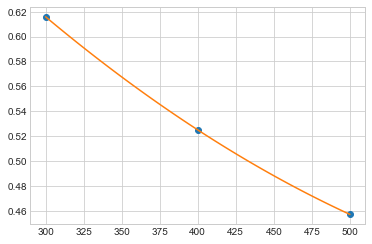

In [2]:
x = np.array([300, 400, 500])
f = np.array([0.616, 0.525, 0.457])

Z = np.c_[x**2, x, np.ones(len(x))]
p = np.linalg.solve(Z, f)

p1 = np.polyfit(x, f, 2)

print(p, p1, np.polyval(p, 350))

plt.plot(x, f, 'o')
xs = np.linspace(300, 500)
fs = np.polyval(p, xs)
plt.plot(xs, fs);

print('condition number %15.5e' % np.linalg.cond(Z))

### 17.2 Newton's divided difference interpolation

For $n=1$

$$p_1 (x) = a_0 + a_1(x-x_0)$$

$$p_1(x_0) = f_0, \, p_1(x_1) = f_1 = a_0 + a_1(x_1-x_0)$$

$$ a_0  = f_0, \quad a_1 = \frac{f_1 - f_0}{x_1 - x_0} = f[x_0, x_1] $$

For $n=2$
$$p_2 (x) = a_0 + a_1 (x - x_0) + a_2(x-x_0)(x-x_1) = a_0 + (x-x_0)(a_1 + (x-x_1)a_2)$$

$$p_2(x_2) = f_2 = f_0 + f[x_0, x_1](x_2-x_0) + a_2 (x_2-x_0)(x_2-x_1) $$

$$\begin{align} a_2 &= \frac{1}{x_2-x_0} \left( \frac{f_2-f_0}{x_2-x_1} - f[x_0,x_1]\frac{x_2-x_0}{x_2-x_1} \right) \\
&= \frac{1}{x_2-x_0} \left( \frac{f_2-f_1+f_1-f_0}{x_2-x_1} - f[x_0,x_1]\frac{x_2-x_1+x_1-x_0}{x_2-x_1} \right) \\
&= \frac{1}{x_2-x_0} \left( f[x_1,x_2] + \frac{f_1-f_0}{x_2-x_1} - f[x_0,x_1] - \frac{f_1-f_0}{x_1-x_0}\frac{x_1-x_0}{x_2-x_1} \right) \\
&= \frac{f[x_1,x_2]-f[x_0,x_1]}{x_2-x_0} \\
&= f[x_0,x_1,x_2] \\
\end{align}$$

For $n=3$
$$ p_3 (x) = a_0 + (x-x_0)(a_1 + (x-x_1)(a_2 + (x-x_2)a_3))$$

$$a_3 = \frac{f[x_1,x_2,x_3]-f[x_0,x_1,x_2]}{x_3 - x_0} = f[x_0,x_1,x_2,x_3]$$

k-th divided difference

$$a_k = f[x_0, \cdots , x_k] = \frac{f[x_1, \cdots,x_k]-f[x_0, \cdots, x_{k-1}]}{x_k - x_0}$$

### Example 17.2

[[ 8.000e+00  2.079e+00  0.000e+00  0.000e+00  0.000e+00]
 [ 9.000e+00  2.197e+00  1.180e-01  0.000e+00  0.000e+00]
 [ 9.500e+00  2.251e+00  1.080e-01 -6.000e-03  0.000e+00]
 [ 1.100e+01  2.398e+00  9.800e-02 -5.000e-03  0.000e+00]]
[ 2.0794e+00  1.1780e-01 -6.4000e-03  4.0000e-04]
2.2192


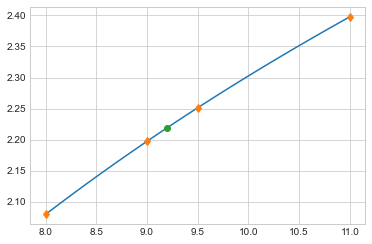

In [3]:
x = np.array([8., 9., 9.5, 11.])
f = np.log(x)

n = len(f)
T = np.zeros((n,n))
T[:, 0] = f
for k in range(1, n):
    for i in range(k, n):
        T[i, k] = (T[i, k-1] - T[i-1, k-1]) / (x[i] - x[i-k])        

printt(np.c_[x, T], 3)

a = np.diag(T)
printt(a)

z = 9.2
p = a[-1]
for k in reversed(range(len(a)-1)):
    p = a[k] + (z - x[k])*p
printt(p)

xx = np.linspace(8, 11)
ff = np.log(xx)
plt.plot(xx, ff)
plt.plot(x, f, 'd')
plt.plot(z, p, 'o')
plt.show()

In [4]:
def divided_difference_table(x, f):
    n = len(f)
    T = np.zeros((n,n))
    T[:, 0] = f
    for k in range(1, n):
        for i in range(k, n):
            T[i, k] = (T[i, k-1] - T[i-1, k-1]) / (x[i] - x[i-k])        
    return T

def divided_difference(x, f):
    for k in range(1, len(f)):
        f[k:] = (f[k:] - f[k-1:-1])/(x[k:] - x[:-k])
    return f

def newton_polyval(a, c, x):
    p = a[-1]
    for k in reversed(range(len(a)-1)):
        p = a[k] + (x - c[k])*p    
    return p    

[ 2.07944154e+00  1.17783036e-01 -6.43239541e-03  4.10999624e-04]


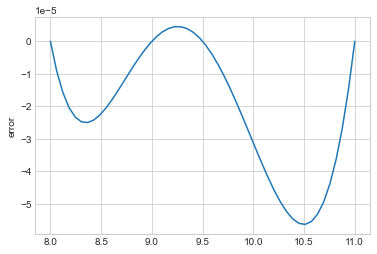

In [5]:
x = np.array([8., 9., 9.5, 11.])
f = np.log(x)

a = divided_difference(x, f)
print(a)

xs = np.linspace(8, 11)
fs = np.empty_like(xs)
for i in range(len(xs)):
    fs[i] = newton_polyval(a, x, xs[i])

plt.plot(xs, fs - np.log(xs))    
plt.ylabel('error')
plt.show()

## Lagrange interpolation polynomials

Given $x_0, x_1, \cdots, x_n$, define the **cardinal functions** $l_0, l_1, \cdots, l_n $, satisfying the properties
$$l_i(x_j) = \delta_{ij} \quad 0 \:\: \rm if \:\: \it i \ne j, \quad \rm 1 \:\: \rm if \:\: \it i=j$$
$\delta_{ij}$ is called Kronecker delta
$$l_i(x) = \prod_{j=0, j\ne i}^n \left ( \frac{x-x_j}{x_i - x_j} \right )$$ 

Lagrange interpolation polynomial
$$p_n(x) = \sum_{i=0}^n l_i(x) y_i$$
It is easy to check the interpolation property:
$$p_n(x_j) = \sum_{i=0}^n l_i(x_j) y_i = y_j$$

For $n=1$

$$ l_0(x) = \frac{x-x_1}{x_0-x_1}, \quad l_1(x) = \frac{x-x_0}{x_1-x_0}$$

$$ p_1(x) = l_0(x) y_0 + l_1(x)y_1 = \frac{x-x_1}{x_0-x_1} y_0 + \frac{x-x_0}{x_1-x_0} y_1 = y_0 + \frac{y_1-y_0}{x_1-x_0}(x-x_0)$$

For $n=2$

$$ p_2(x) = l_0(x) y_0 + l_1(x)y_1 + l_2(x)y_2 $$

$$ l_0(x) = \frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)}, \quad l_1(x) = \frac{(x-x_2)(x-x_0)}{(x_1-x_2)(x_1-x_0)}, \quad l_2(x) = \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)}$$

In [6]:
def cardinal(x, z):
    n = len(x)
    L = np.ones_like(x, dtype=float)
    for k in range(n):
        p = 1
        for j in range(n):
            if k != j: 
                p *= (z - x[j])/(x[k] - x[j])
        L[k] = p
    return L

def lagrange_interpolation(x, f, z):
    return np.dot(f, cardinal(x, z))

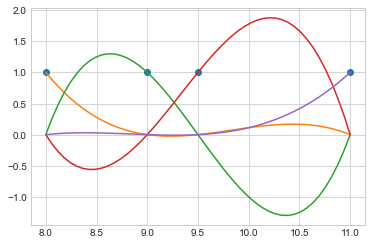

In [7]:
x = np.array([8., 9., 9.5, 11.])
f = np.log(x)

plt.plot(x, np.ones_like(x), 'o')
xs = np.linspace(8, 11)
L = np.empty((len(xs), len(x)))
for i in range(len(xs)):
    L[i] = cardinal(x, xs[i])
plt.plot(xs, L);


0.00020078308835909769
0.000200783088359157


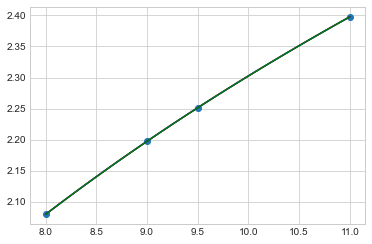

In [10]:
x = np.array([8., 9., 9.5, 11.])
f = np.log(x)
plt.plot(x,f,'o')

a = divided_difference(x, f.copy())

xx = np.linspace(8, 11)
ff1 = np.empty_like(xx)
ff2 = np.empty_like(xx)
for i in range(len(xx)):
    ff1[i] = newton_polyval(a, x, xx[i])
    ff2[i] = lagrange_interpolation(x, f, xx[i])
plt.plot(xx, np.log(xs), 'r')
plt.plot(xx, ff1, 'b')
plt.plot(xx, ff2, 'g');
print(np.linalg.norm(np.log(xx) - ff1))
print(np.linalg.norm(np.log(xx) - ff2))

## Barycentric forms of Lagrange polynomials

Let 
$$l(x) = \prod_{i=0}^n (x-x_i)$$ 
define the barycentric weights
$$w_j = \left( \prod_{k=0, k \ne j}^n (x_j - x_k) \right )^{-1}$$
cardinal function
$$l_i (x) = l(x) \frac{w_i}{x-x_i}$$
first form of the barycentric interpolation formula
$$ p(x) = l(x) \sum_{j=0}^n \frac{w_j}{x-x_j} y_j$$
second form of the barycentric interpolation formula
$$ p(x) = \frac{ \sum_{j=0}^n \frac{w_j}{x-x_j} y_j } {\sum_{j=0}^n \frac{w_j}{x-x_j}} $$


In [15]:
def weight_naive(x):
    n = len(x)
    w = np.ones(n)
    for j in range(n):
        for k in range(n):
            if j == k:
                continue
            w[j] *= (x[j] - x[k])
    w = 1/w
    return w

def weight(x):
    n = len(x)
    w = np.ones(n)
    for j in range(1,n):
        for k in range(j):
            w[k] = (x[k] - x[j])*w[k]
        w[j] = np.prod(x[j] - x[:j])    
    w = 1/w
    return w

def barycentric(x, y, w, xx):
    p2 = w/(xx-x)
    p1 = p2*y
    return p1.sum()/p2.sum()

In [16]:
x = np.array([0, 2/3, 1])
y = np.array([1, 0.5, 0])
w = weight(x)

xx = 1/2
barycentric(x, y, w, xx)

0.6875

## scipy.interpolate.interp1d

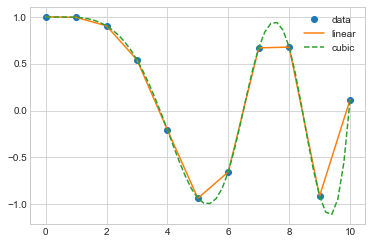

In [14]:
from scipy.interpolate import interp1d

x = np.linspace(0, 10, 11)
y = np.cos(-x**2/9.0)

f1 = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')

xx = np.linspace(0, 10, 51)

plt.plot(x, y, 'o')
plt.plot(xx, f1(xx), '-', xx, f2(xx), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

### Python function
- polyval(p, x)	    Evaluate a polynomial at specific values.
- poly(seq_of_zeros)	Find the coefficients of a polynomial with the given sequence of roots.
- roots(p)	        Return the roots of a polynomial with coefficients given in p.

**Fitting**
- polyfit(x, y, deg)	Least squares polynomial fit.

**Calculus**
- polyder(p)	Return the derivative of the specified order of a polynomial.
- polyint(p)	Return an antiderivative (indefinite integral) of a polynomial.

**Arithmetic**
- polyadd(a1, a2)	Find the sum of two polynomials.
- polydiv(u, v)	Returns the quotient and remainder of polynomial division.
- polymul(a1, a2)	Find the product of two polynomials.
- polysub(a1, a2)	Difference (subtraction) of two polynomials.

**spline**
- scipy.interpolate.spline(xk, yk, xnew, order=3, kind='smoothest', conds=None)
- scipy.interpolate.spleval(xck, xnew, deriv=0)